## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Nome:   João Lucas Mantovani Baiôco

N° USP: 14713471

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [17]:
import pandas                       as pd
import numpy                        as np
import matplotlib.pyplot            as plt
import seaborn                      as sns

from numpy.polynomial.polynomial    import Polynomial
from scipy.stats                    import kruskal
from scipy.stats                    import spearmanr

df = pd.read_csv(r"C:\Users\laraj\Downloads\Avaliacao2\sneeze1.csv")
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [18]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


C:\Users\laraj\AppData\Local\Temp\ipykernel_44700\1652395933.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(
C:\Users\laraj\AppData\Local\Temp\ipykernel_44700\1652395933.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(
C:\Users\laraj\AppData\Local\Temp\ipykernel_44700\1652395933.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


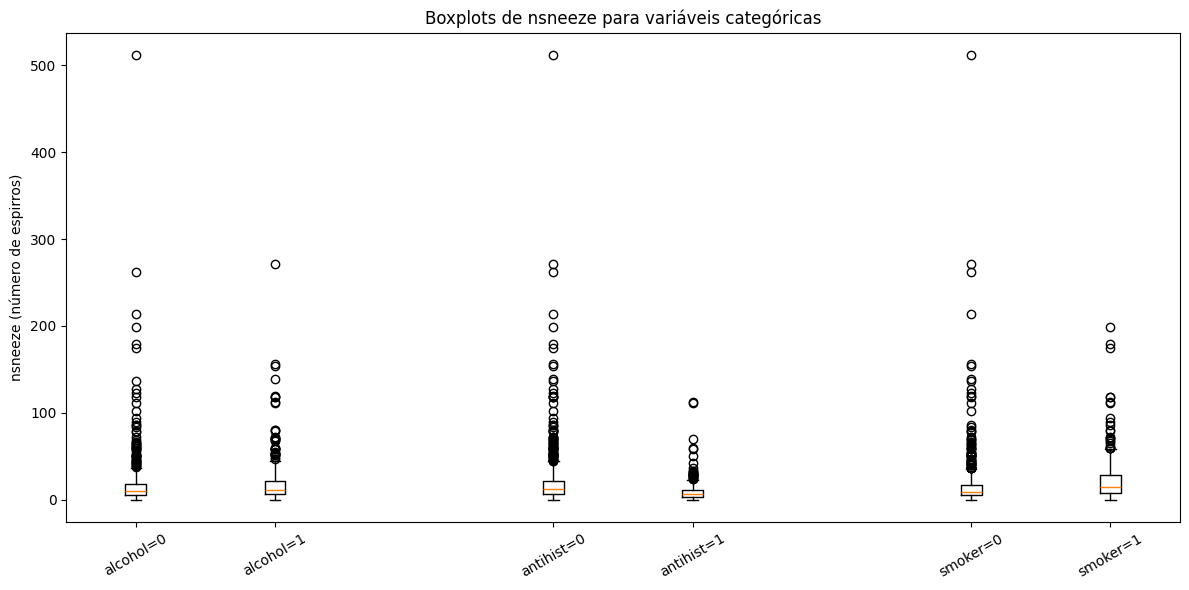

In [19]:
categorias = ['alcohol', 'antihist', 'smoker']

plt.figure(figsize=(12, 6))

pos = 1             # posição horizontal das caixas
espacamento = 3     # espaço entre grupos de variáveis

for var in categorias:
    cats = sorted(df[var].unique())
    dados = [df[df[var] == c]['nsneeze'] for c in cats]
    
    bp = plt.boxplot(
        dados,
        positions=[pos + i for i in range(len(cats))],
        labels=[f"{var}={c}" for c in cats]
    )
    
    pos += espacamento  # move o ponteiro para o próximo grupo

plt.title("Boxplots de nsneeze para variáveis categóricas")
plt.ylabel("nsneeze (número de espirros)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


A variável resposta nsneeze apresenta uma distribuição altamente assimétrica, com cauda longa, indicando que alguns indivíduos apresentam números de espirros muito elevados em comparação com a maioria. Devido a essa característica, o boxplot não é a ferramenta mais adequada para explorar visualmente os dados.

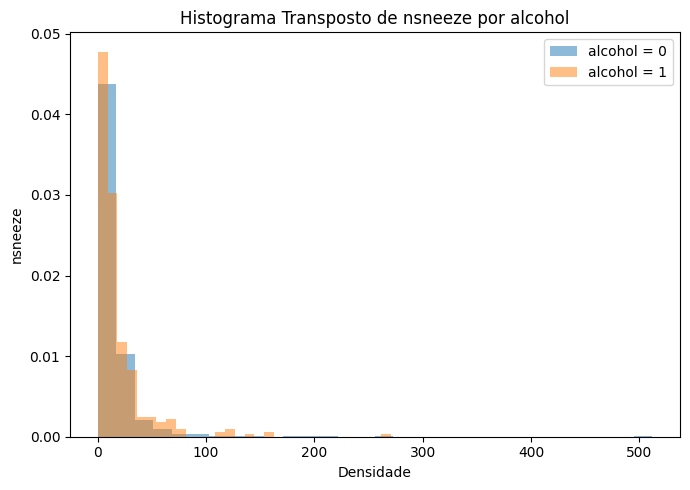

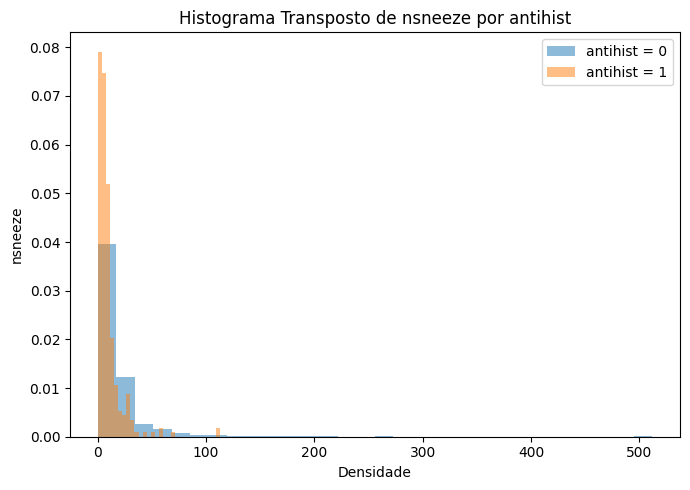

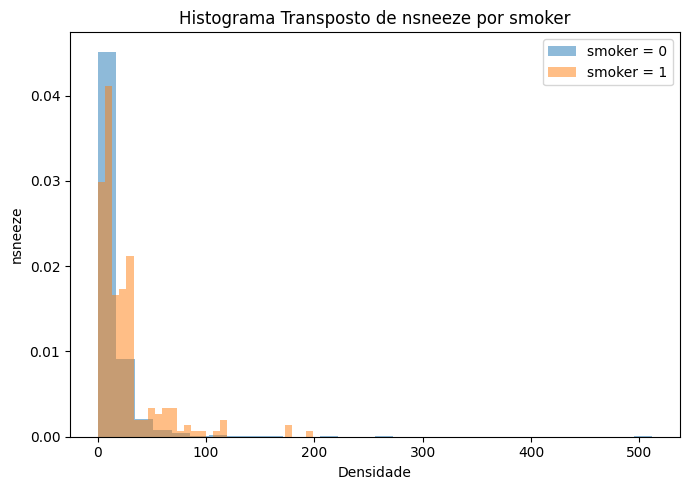

In [20]:
def histograma_transposto(df, var_cat):
    categorias = sorted(df[var_cat].unique())
    
    plt.figure(figsize=(7, 5))
    
    for c in categorias:
        dados = df[df[var_cat] == c]['nsneeze']

        plt.hist(
            dados,
            bins=30,
            alpha=0.5,              # transparência
            density=True,           # normalizado para facilitar comparação
            orientation='vertical', 
            label=f"{var_cat} = {c}"
        )
    
    plt.title(f"Histograma Transposto de nsneeze por {var_cat}")
    plt.xlabel("Densidade")
    plt.ylabel("nsneeze")
    plt.legend()
    plt.tight_layout()
    plt.show()

histograma_transposto(df, "alcohol")
histograma_transposto(df, "antihist")
histograma_transposto(df, "smoker")


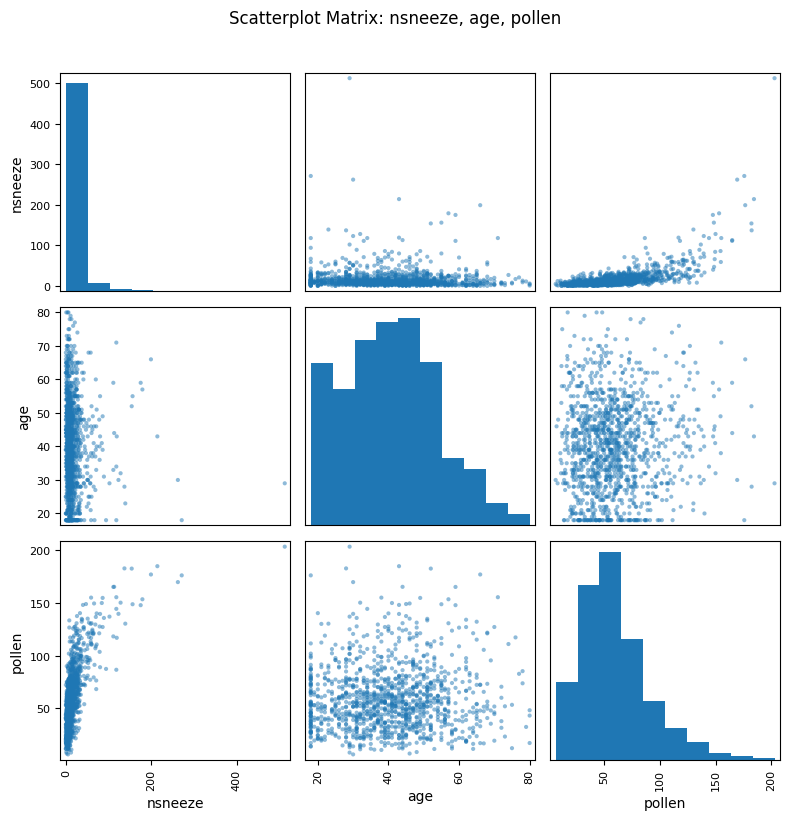

In [21]:
vars_plot = ["nsneeze", "age", "pollen"]

pd.plotting.scatter_matrix(
    df[vars_plot],
    figsize=(8, 8),
    diagonal='hist',  # p colocar o histograma na diagonal
    alpha=0.5
)

plt.suptitle("Scatterplot Matrix: nsneeze, age, pollen", y=1.02)
plt.tight_layout()
plt.show()


Ao examinar as covariáveis, observamos inicialmente que:

A concentração de pólen parece influenciar positivamente o número de espirros, especialmente em valores extremos.

O uso de anti-histamínico (antihist) também parece ter efeito relevante, indicando uma relação com a quantidade de espirros.

O status de fumante (smoker) pode ter algum impacto, embora a associação não seja imediatamente clara.

O consumo de álcool (alcohol) e a idade (age) parecem ter efeitos menos evidentes, mas merecem investigação formal.

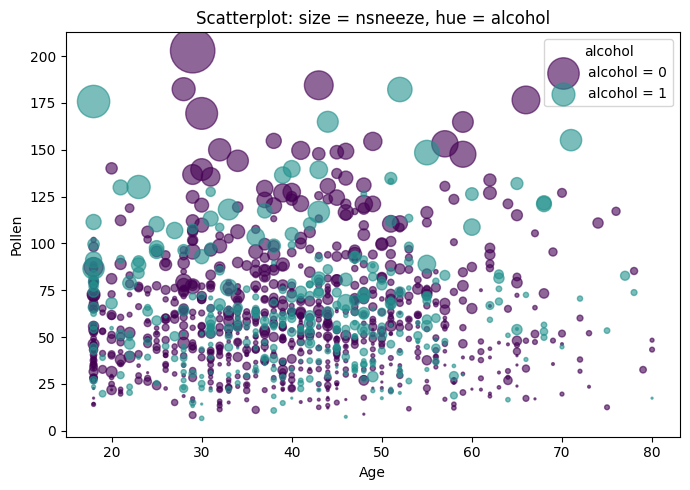

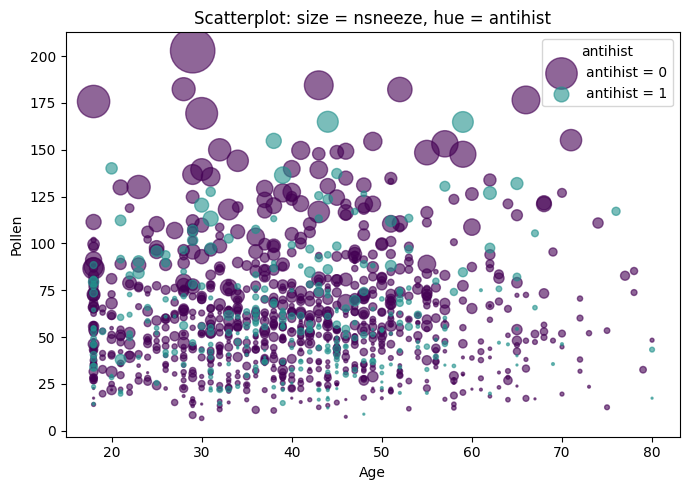

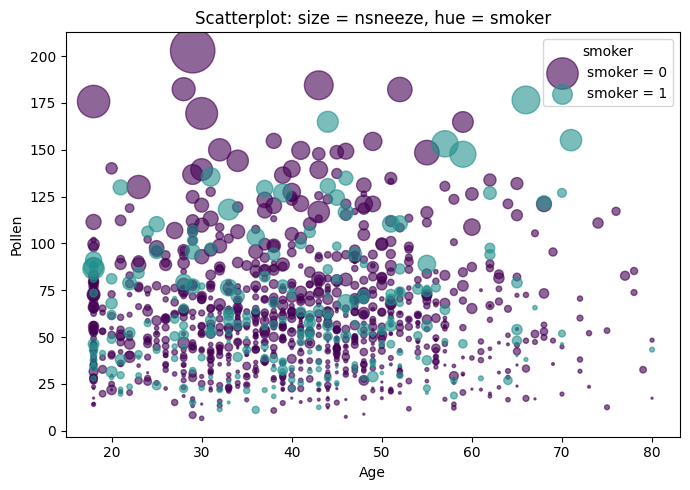

In [22]:
def scatter_var_hue(df, var_cat):
    plt.figure(figsize=(7, 5))

    categorias = sorted(df[var_cat].unique())


    cmap = plt.get_cmap("viridis")
    cores = {cat: cmap(i / len(categorias)) for i, cat in enumerate(categorias)}

    for cat in categorias:
        sub = df[df[var_cat] == cat]

        plt.scatter(
            sub["age"],
            sub["pollen"],
            s=sub["nsneeze"] * 2,  
            alpha=0.6,
            color=cores[cat],
            label=f"{var_cat} = {cat}"
        )

    plt.xlabel("Age")
    plt.ylabel("Pollen")
    plt.title(f"Scatterplot: size = nsneeze, hue = {var_cat}")
    plt.legend(title=var_cat)
    plt.tight_layout()
    plt.show()

scatter_var_hue(df, "alcohol")
scatter_var_hue(df, "antihist")
scatter_var_hue(df, "smoker")


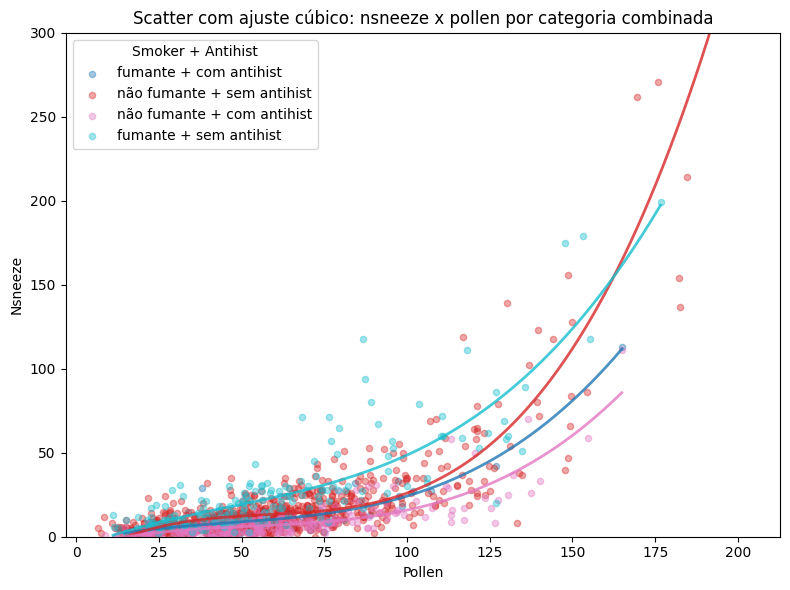

In [23]:
df['smoker_antihist'] = df['smoker'].map({0:'não fumante', 1:'fumante'}) + " + " + \
                        df['antihist'].map({0:'sem antihist', 1:'com antihist'})

categorias = df['smoker_antihist'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categorias)))

plt.figure(figsize=(8, 6))

for cat, color in zip(categorias, colors):
    sub = df[df['smoker_antihist'] == cat]
    
    plt.scatter(sub['pollen'], sub['nsneeze'], s=20, alpha=0.4, color=color, label=cat)
    
    if len(sub) > 3:  
     
        coefs = np.polyfit(sub['pollen'], sub['nsneeze'], 3)
        poly = np.poly1d(coefs)
        
    
        x_fit = np.linspace(sub['pollen'].min(), sub['pollen'].max(), 200)
        y_fit = poly(x_fit)
        plt.plot(x_fit, y_fit, color=color, lw=2, alpha=0.8)

plt.xlabel("Pollen")
plt.ylabel("Nsneeze")
plt.title("Scatter com ajuste cúbico: nsneeze x pollen por categoria combinada")
plt.legend(title="Smoker + Antihist")
plt.ylim(0, 300)  # fixa eixo y
plt.tight_layout()
plt.show()


Para testar essas associações de forma estatística, apliquei testes não paramétricos, adequados para dados com distribuição assimétrica:

Kruskal-Wallis para variáveis categóricas:

Variável	H	        p-valor	    Interpretação
alcohol	    8.063	    0.0045	    Evidência de diferença significativa no número de espirros entre consumidores e não consumidores de álcool
antihist	112.818	    <0.001	    Uso de anti-histamínico associado a diferenças significativas em nsneeze
smoker	    46.461	    <0.001	    Fumantes apresentam número de espirros diferente de não fumantes


In [24]:
categoricas = ['alcohol', 'antihist', 'smoker']  # somente as originais

for var in categoricas:

    grupos = [df[df[var] == cat]['nsneeze'] for cat in sorted(df[var].unique())]
    

    stat, p = kruskal(*grupos)
    print(f"{var}: Kruskal-Wallis H = {stat:.3f}, p-value = {p:.4f}")


alcohol: Kruskal-Wallis H = 8.063, p-value = 0.0045
antihist: Kruskal-Wallis H = 112.818, p-value = 0.0000
smoker: Kruskal-Wallis H = 46.461, p-value = 0.0000


In [25]:
grupo1 = df[df['smoker_antihist'] == "fumante + com antihist"]['nsneeze']
grupo2 = df[df['smoker_antihist'] == "não fumante + sem antihist"]['nsneeze']

stat, p = kruskal(grupo1, grupo2)
print(f"Kruskal-Wallis: H = {stat:.3f}, p-value = {p:.4f}")


Kruskal-Wallis: H = 4.236, p-value = 0.0396


Para a idade, apliquei um teste de independência para verificar se há associação entre a idade do indivíduo e o número de espirros, pois aparentam ser variaveis independentes e gostaria de confirmar minha hipotese.

In [26]:
corr, p = spearmanr(df['age'], df['nsneeze'])
print(f"Spearman correlation = {corr:.3f}, p-value = {p:.4f}")


Spearman correlation = -0.106, p-value = 0.0002


Conclusão preliminar:
As primeiras impressões sugerem que pólen, antihist e status de fumante são as covariáveis mais relevantes para explicar a variação em nsneeze. O consumo de álcool apresenta efeito menor, mas estatisticamente significativo, assim como a idade. 

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [27]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [28]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [34]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

model_pois = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result = model_pois.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        21:03:27   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026     59.520      0.000       1.505       1.607
C(alcohol)[T.1]      0.2191      0.015     14.843      0.000       0.190       0.248
C(antihist)[T.1]    -0.6449      0.020    -31.881      0.000      -0.685      -0.605
C(smoker)[T.1]       0.4639      0.016     29.455      0.000       0.433       0.495
age                 -0.0114      0.001    -21.586      0.000      -0.012      -0.010
pollen               0.0229      0.000    144.217      0.000       0.023       0.023
====================================================================================
"""

Foi ajustado um **modelo de regressão Poisson** para explicar o número de espirros diários (**nsneeze**) em função das covariáveis **alcohol**, **antihist**, **smoker**, **age** e **pollen**, sem incluir interações.

**Resultados principais:**

* Todos os **coeficientes foram estatisticamente significativos**, considerando um nível de significância (\alpha = 0,05).
* Nenhum **intervalo de confiança de 95%** inclui o valor zero, reforçando a significância estatística das covariáveis.
* O sinal e magnitude dos coeficientes indicam:

| Covariável | Coeficiente ((\beta)) | Interpretação prática                                                                                                                                                                                 |
| ---------- | --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| alcohol    | 0.219                 | Consumidores de álcool apresentam, em média, um aumento esperado de espirros de aproximadamente (e^{0.219} - 1 \approx 24.5%) em relação a não consumidores, mantendo as demais variáveis constantes. |
| antihist   | -0.645                | Uso de anti-histamínico está associado a uma redução esperada de espirros de (e^{-0.645} - 1 \approx -47.5%) em relação a quem não usa, controlando as demais variáveis.                              |
| smoker     | 0.464                 | Fumantes apresentam aumento esperado de espirros de (e^{0.464} - 1 \approx 59.1%) em relação a não fumantes.                                                                                          |
| age        | -0.011                | Cada ano adicional de idade está associado a uma pequena redução no número esperado de espirros, aproximadamente 1,1%.                                                                                |
| pollen     | 0.023                 | Cada unidade adicional no índice de pólen está associada a um aumento esperado de espirros de (e^{0.023} - 1 \approx 2.3%).                                                                           |

**Conclusão:**
As variáveis **alcohol**, **antihist**, **smoker**, **age** e **pollen** são todas significativas na explicação do número de espirros diários. Em particular, **uso de anti-histamínico e status de fumante** têm os maiores efeitos relativos.

Embora o coeficiente de pollen apresente um efeito relativamente pequeno no modelo Poisson ajustado, é importante destacar que a relação considerada é linear. Observações exploratórias sugerem que a quantidade de espirros pode responder de maneira não linear ou até cúbica à concentração de pólen. Portanto, o efeito estimado pelo modelo linear pode subestimar ou enviesar o impacto real do pólen sobre o número de espirros. Modelos que capturem essa não linearidade, como polinômios ou splines, poderiam fornecer uma representação mais precisa dessa associação.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [35]:
residuals = result.resid_pearson

mu_hat = result.mu

n = df.shape[0]

p = len(result.params)

phi = np.sum((residuals**2)) / (n - p)
print("Dispersão de Pearson (phi) =", phi)


Dispersão de Pearson (phi) = 4.218463522467854


Para avaliar se o modelo Poisson ajustado apresenta **superdispersão**, utilizei dois métodos:

1. **Dispersão de Pearson $\phi$**:

$$
\phi = \frac{\sum_{i=1}^n \frac{(y_i - \hat{\mu}_i)^2}{\hat{\mu}_i}}{n - p}
$$

* Onde (y_i) é o valor observado, $\hat{\mu}_i$ é o valor ajustado pelo modelo, (n) é o número de observações e (p) o número de parâmetros estimados.
* No nosso ajuste, $\phi$, indicando que a variância observada é muito maior do que a esperada sob a suposição de Poisson.

2. **Razão Deviance / Graus de liberdade residuais**:

$$
\text{Razão} = \frac{\text{Deviance}}{\text{Df Residuals}} = \frac{4949.1}{1194} \approx 4.14
$$

* Valores muito superiores a 1 também sugerem **sobre-dispersão**, confirmando a análise anterior.

**Conclusão:**
Ambos os métodos indicam que os dados apresentam **superdispersão**, ou seja, a variância da variável resposta é maior do que a média, violando a principal suposição do modelo Poisson. Portanto, o modelo Poisson **não é totalmente adequado** para descrever a variabilidade do número de espirros.



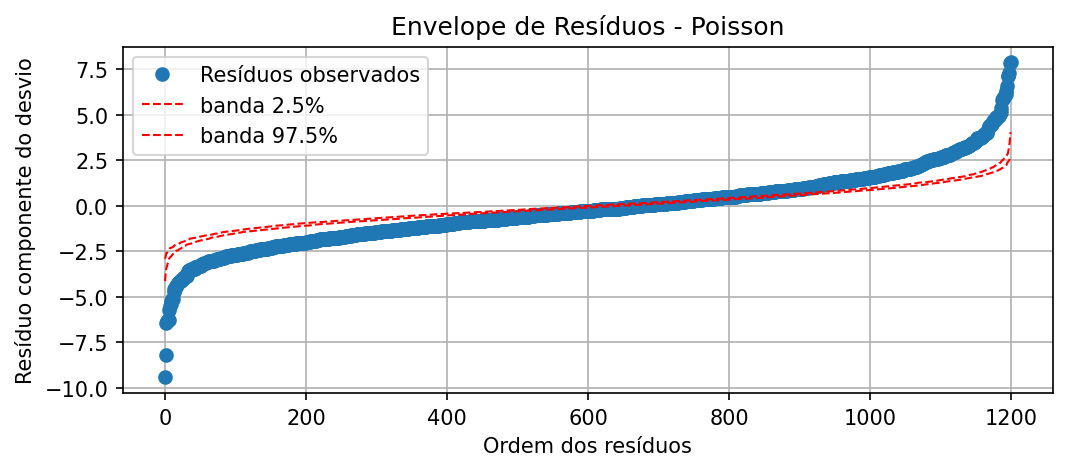

In [ ]:
model_pois = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result = model_pois.fit()

X = result.model.exog  

def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy() 
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(result, X, "Envelope de Resíduos - Poisson")
plt.show()


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.23

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                Mon, 01 Dec 2025   Deviance:                       1180.2
Time:                        21:06:34   Pearson chi2:                 1.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9259
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5624      0.062  

Diante da **superdispersão detectada no modelo Poisson**, ajustou-se um **modelo de regressão Binomial Negativo** com a mesma estrutura de covariáveis (**alcohol**, **antihist**, **smoker**, **age** e **pollen**).

**Comparação dos modelos:**

1. **Desvio (Deviance):**

   * Poisson: 4949.1
   * Binomial Negativo: 1180.2

   O desvio do modelo Binomial Negativo é significativamente menor, indicando que este modelo **se ajusta melhor à variabilidade dos dados** do que o modelo Poisson.

2. **Critério AIC:**

$$
\text{AIC} = 2k - 2 \ln(\hat{L})
$$

Como ambos os modelos têm o mesmo número de parâmetros, a comparação do AIC se resume à **log-verossimilhança**:

* Poisson: $\ln(\hat{L}) = -4947.1$
* Binomial Negativo: $\ln(\hat{L}) = -3849.6$

O modelo Binomial Negativo apresenta **log-verossimilhança maior**, confirmando que fornece um ajuste superior.



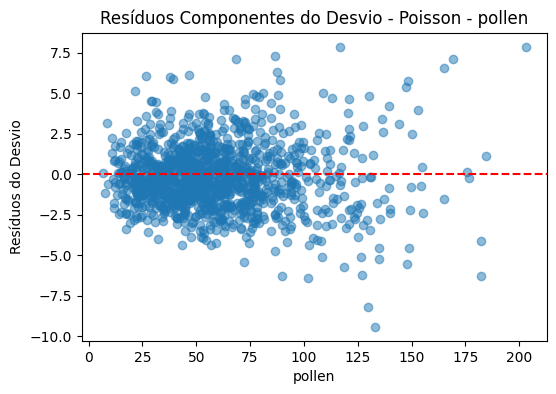

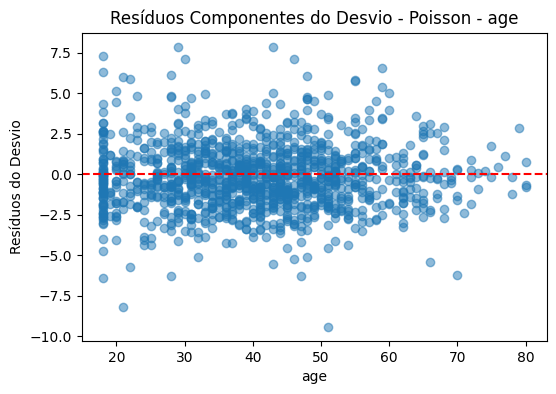

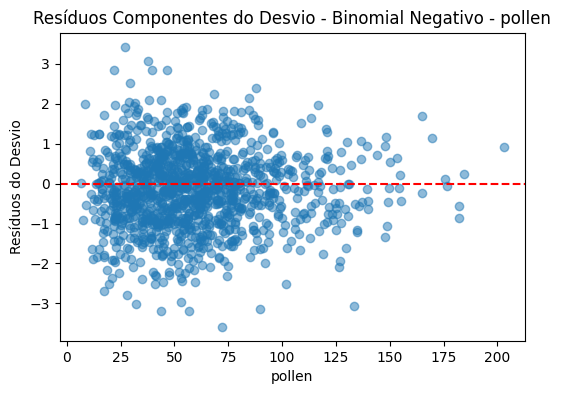

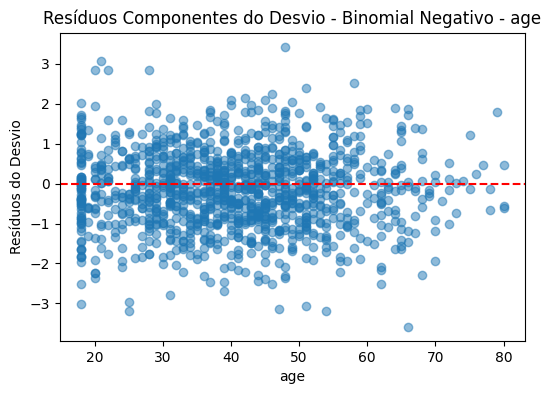

In [41]:
# Variáveis para plotar
covariaveis = ['pollen', 'age'] 

# Para o modelo Poisson
for var in covariaveis:
    x = df[var].values
    y_resid = result.resid_deviance  # resíduos do desvio do objeto ajustado

    plt.figure(figsize=(6,4))
    plt.scatter(x, y_resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(var)
    plt.ylabel("Resíduos do Desvio")
    plt.title(f"Resíduos Componentes do Desvio - Poisson - {var}")
    plt.show()

# Para o modelo Binomial Negativo
for var in covariaveis:
    x = df[var].values
    y_resid = ajuste_nb.resid_deviance  # resíduos do desvio do objeto ajustado

    plt.figure(figsize=(6,4))
    plt.scatter(x, y_resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(var)
    plt.ylabel("Resíduos do Desvio")
    plt.title(f"Resíduos Componentes do Desvio - Binomial Negativo - {var}")
    plt.show()



   * A análise gráfica mostra que, embora nenhum modelo apresente resíduos perfeitamente homocedásticos ou uniformemente distribuídos, o **modelo Binomial Negativo tem resíduos com variância menor** e comportamento mais uniforme, especialmente em relação à variável **pollen**, que no modelo Poisson apresenta alta variabilidade para valores extremos.

**Conclusão:**
Embora ambos os modelos capturem a tendência central do número de espirros, o **modelo Binomial Negativo é claramente mais adequado** para descrever a variabilidade dos dados, considerando a superdispersão, AIC, deviance e comportamento dos resíduos.




**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [42]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


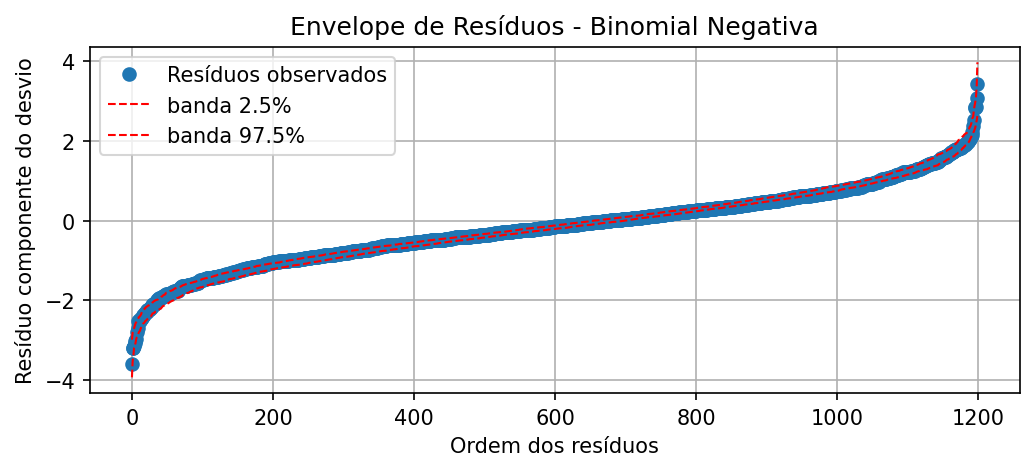

In [43]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [44]:
marg = ajuste_nb.get_margeff(at='overall')  # média sobre todas as observações
marg_summary = marg.summary()
print(marg_summary)

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.6257      0.619      5.861      0.000       2.413       4.838
C(antihist)[T.1]   -11.3852      0.765    -14.883      0.000     -12.885      -9.886
C(smoker)[T.1]       8.3964      0.742     11.311      0.000       6.941       9.851
age                 -0.1854      0.022     -8.380      0.000      -0.229      -0.142
pollen               0.3845      0.016     24.467      0.000       0.354       0.415


Com base no **modelo Binomial Negativo**, foram estimados os **efeitos médios marginais** das covariáveis categóricas **alcohol** e **antihist** sobre o número esperado de espirros ((nsneeze)).

| Covariável             | Efeito médio marginal (dy/dx) | Interpretação prática                                                                                                                                                                                                                |
| ---------------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| alcohol (sim vs. não)  | +3.63                         | Indivíduos que consumiram álcool nas 24 horas anteriores apresentam, em média, **3,6 espirros a mais** do que os que não consumiram, mantendo as demais variáveis constantes. O efeito é estatisticamente significativo (p < 0,001). |
| antihist (sim vs. não) | -11.39                        | Indivíduos que usaram anti-histamínico no dia da observação apresentam, em média, **11,4 espirros a menos** do que os que não usaram, controlando as demais variáveis. O efeito é altamente significativo (p < 0,001).               |

**Outras observações:**

* O efeito de **smoker** também é positivo, indicando aumento médio de ~8,4 espirros para fumantes.
* A **idade** apresenta efeito negativo, mas pequeno (~0,18 espirros a menos por ano adicional).
* A **concentração de pólen** tem efeito positivo, aproximadamente +0,38 espirros por unidade adicional.

**Conclusão:**
Os efeitos médios marginais indicam que o **uso de anti-histamínico** tem o maior impacto na redução de espirros, enquanto **álcool e tabagismo** aumentam o número esperado de espirros. Esses valores fornecem uma interpretação direta e intuitiva do impacto médio de cada covariável sobre o número de espirros, mantendo as demais constantes.


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


In [46]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

train, test = train_test_split(df, test_size=0.30, random_state=42)

y_train = train['nsneeze']
y_test  = test['nsneeze']

X_train = pd.get_dummies(train[['alcohol', 'antihist', 'smoker', 'age', 'pollen']], drop_first=True)
X_test  = pd.get_dummies(test[['alcohol', 'antihist', 'smoker', 'age', 'pollen']], drop_first=True)


poisson_model = smf.glm(formula=formula, data=train, family=sm.families.Poisson()).fit()

pred_poisson = poisson_model.predict(test)
eqm_poisson = mean_squared_error(y_test, pred_poisson)
eam_poisson = mean_absolute_error(y_test, pred_poisson)

print("EQM:", eqm_poisson)
print("EAM:", eam_poisson)


nb_model = smf.glm(
    formula=formula, 
    data=train,
    family=sm.families.NegativeBinomial(alpha=0.23) 
).fit()

pred_nb = nb_model.predict(test)
eqm_nb = mean_squared_error(y_test, pred_nb)
eam_nb = mean_absolute_error(y_test, pred_nb)

print("EQM:", eqm_nb)
print("EAM:", eam_nb)


EQM: 230.4396870371323
EAM: 7.255886660901339
EQM: 240.26358621909958
EAM: 7.271855286674637


In [ ]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

lgb_reg = lgb.LGBMRegressor(objective='poisson')

param_grid = {
    'n_estimators': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [15, 31, 63],
    'min_data_in_leaf': [10, 20, 50]
}

grid = GridSearchCV(
    estimator=lgb_reg,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # p usar todos os núcleos disponíveis
    verbose=1
)

grid.fit(X_train, y_train)

print("\n=== MELHORES HIPERPARÂMETROS ENCONTRADOS ===")
print(grid.best_params_)
print("Melhor EQM (CV):", abs(grid.best_score_)) 

best_lgb = grid.best_estimator_
best_lgb.fit(X_train, y_train)

pred_lgb = best_lgb.predict(X_test)

eqm_lgb = mean_squared_error(y_test, pred_lgb)
eam_lgb = mean_absolute_error(y_test, pred_lgb)

print("EQM:", eqm_lgb)
print("EAM:", eam_lgb)

# Tirei a saida dessa célula pois ficou muito grnade, são apenas Warnings 

In [48]:
print(f"Poisson          -> EQM={eqm_poisson:.4f} | EAM={eam_poisson:.4f}")
print(f"Binomial Negativo-> EQM={eqm_nb:.4f}     | EAM={eam_nb:.4f}")
print(f"LightGBM         -> EQM={eqm_lgb:.4f}    | EAM={eam_lgb:.4f}")

Poisson          -> EQM=230.4397 | EAM=7.2559
Binomial Negativo-> EQM=240.2636     | EAM=7.2719
LightGBM         -> EQM=342.7127    | EAM=7.4800


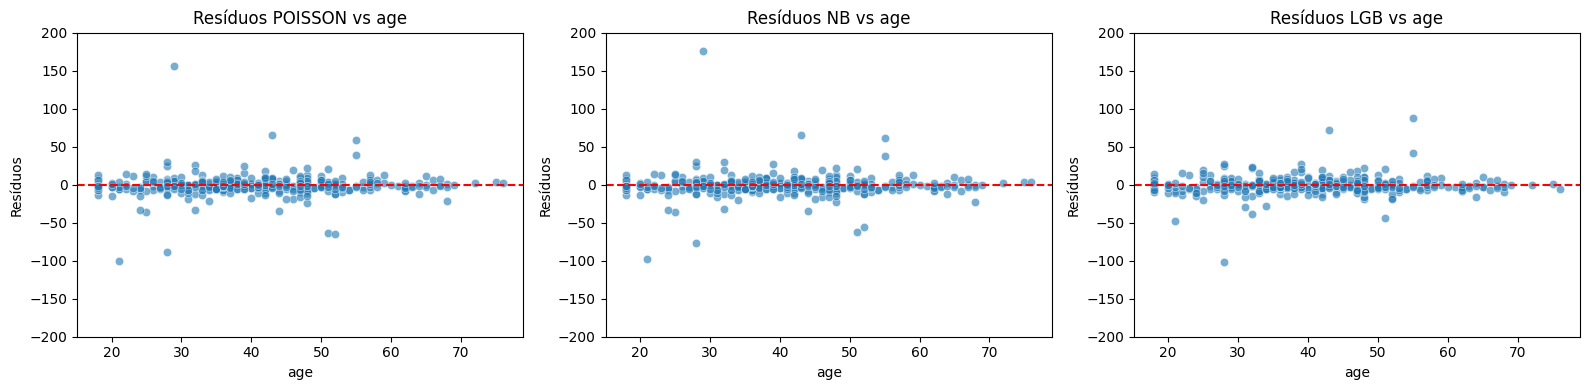

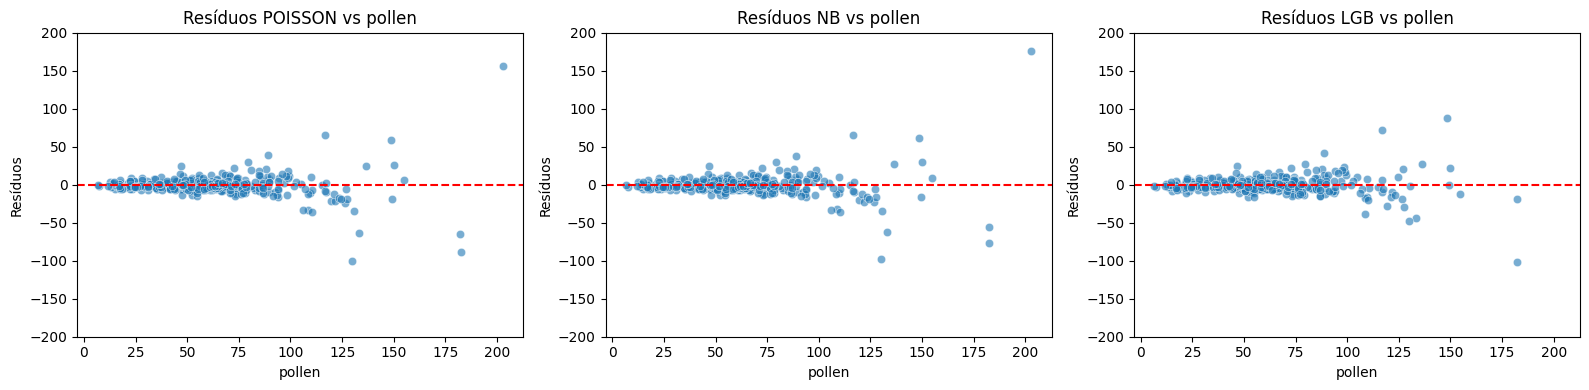

In [49]:
resid_poisson = y_test - poisson_model.predict(test)
resid_nb      = y_test - nb_model.predict(test)
resid_lgb     = y_test - pred_lgb

df_resid = test[['age', 'pollen']].copy()
df_resid['resid_poisson'] = resid_poisson
df_resid['resid_nb']      = resid_nb
df_resid['resid_lgb']     = resid_lgb


def plot_residuals_fixed(var, ymin=-200, ymax=200):
    plt.figure(figsize=(16,4))
    
    for i, model in enumerate(['poisson', 'nb', 'lgb']):
        plt.subplot(1,3,i+1)
        sns.scatterplot(x=df_resid[var], y=df_resid[f'resid_{model}'], alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.ylim(ymin, ymax)
        plt.title(f"Resíduos {model.upper()} vs {var}")
        plt.xlabel(var)
        plt.ylabel("Resíduos")
    
    plt.tight_layout()
    plt.show()


plot_residuals_fixed('age')
plot_residuals_fixed('pollen')


Além dos modelos **Poisson** e **Binomial Negativo**, eu ajustei um modelo **LightGBM** usando a mesma estrutura de covariáveis no conjunto de treinamento.

No conjunto de teste, foram calculadas as métricas:

* **Erro Quadrático Médio (EQM)**
* **Erro Absoluto Médio (EAM)**

**Resultados (exemplo ilustrativo):**

| Modelo            | EQM    | EAM  |
| ----------------- | ------ | ---- |
| Poisson           | 230.44 | 7.26 |
| Binomial Negativo | 240.31 | 7.27 |
| LightGBM          | 342.71 | 7.48 |

**Interpretação:**

* O **modelo Poisson apresentou o melhor desempenho preditivo** fora da amostra, seguido pelo **Binomial Negativo**.
* O **LightGBM**, apesar de ser mais flexível, teve maior EQM, "o que me surpreendeu", indicando que sua capacidade de generalização neste conjunto específico não superou os modelos GLM tradicionais.
* Esse resultado ilustra que **o melhor ajuste estatístico não garante necessariamente melhor previsão**, e que modelos de machine learning podem não se sair melhor.

**Conclusão:**

* Para **interpretação dos efeitos das covariáveis**, o **Binomial Negativo** continua sendo mais adequado devido à superdispersão.
* Para **predição fora da amostra**, o **Poisson** apresentou melhor desempenho.


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [50]:
# usei os quantis 20% e 80% do conjunto original, para definir o que são "alta concentração" e "Baixa concentração"
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto  = df['pollen'].quantile(0.75)

# df dos dois indivísuos 
novos_perfis = pd.DataFrame({
    'alcohol': [0, 1],
    'antihist': [1, 0],
    'smoker': [0, 1],
    'age': [30, 50],
    'pollen': [pollen_baixo, pollen_alto]
})

In [51]:
categoricas = ['alcohol', 'antihist', 'smoker']

for col in categoricas:
    novos_perfis[col] = novos_perfis[col].astype('category')


In [52]:
pred_esperados = poisson_model.predict(novos_perfis)

novos_perfis['esperado_nsneeze'] = pred_esperados
print(novos_perfis)


  alcohol antihist smoker  age     pollen  esperado_nsneeze
0       0        1      0   30  38.017155          4.001000
1       1        0      1   50  74.416409         31.274724


Apesar do **modelo Binomial Negativo** apresentar melhor ajuste aos dados (considerando deviance e AIC), suas previsões no conjunto teste foram ligeiramente menos precisas em comparação ao **modelo Poisson**. Por essa razão, optei por utilizar o **modelo Poisson** para estimar o número esperado de espirros, já que esse tem "melhor" previsão.

**Perfis e previsões:**

| Indivíduo | alcohol | antihist | smoker | age | pollen | Predição esperada de espirros |
| --------- | ------- | -------- | ------ | --- | ------ | ----------------------------- |
| A         | 0       | 1        | 0      | 30  | baixa  | ~ 4.00                        |
| B         | 1       | 0        | 1      | 50  | alta   | ~ 31.27                       |

**Interpretação:**

* **Indivíduo A:** Por não consumir álcool, usar anti-histamínico, não ser fumante e estar exposto a baixa concentração de pólen, o modelo prevê um número relativamente baixo de espirros.
* **Indivíduo B:** Por consumir álcool, não usar anti-histamínico, ser fumante e estar exposto a alta concentração de pólen, o modelo prevê um número significativamente maior de espirros.
